# 凸計画問題

$r$個のデータ$\boldsymbol{s}_l \in \mathbb{R}^d \ (l=1,...,r)$が与えられているとき、ある意味でこのデータの中心とみなせる点$\boldsymbol{v} \in \mathbb{R}^d$を求めることを考える。データ点からのユークリッド距離の総和が最小になる点を求める。次の2次錘計画問題として定式化できる。
$$
 \begin{equation*}
       \begin{aligned}
           & \text{Minimize}
               & \sum_{l=1}^{r} z_l \\
           & \text{subject to}
               & z_l &\ge \|\boldsymbol{v}-\boldsymbol{s}_l\|_2, \ \ l=1,...r \\
       \end{aligned}
   \end{equation*}
$$

変数は$\boldsymbol{v} \in \mathbb{R}^d$および$z_1,...,z_r \in \mathbb{R}$

In [1]:
import cvxpy as cp
import numpy as np

In [2]:
S = np.array([
    [2.0, 4.0, 5.0, 1.0, 3.0],
    [4.0, 2.0, 3.0, 3.0, 1.0] ])
d, r = S.shape[0], S.shape[1]
v, z = cp.Variable(d), cp.Variable(r)
obj  = cp.Minimize( sum(z) )
cons = []
for l in range(0,r):
    cons += [
        z[l] >= cp.norm(v - S[:,l])
    ]
P = cp.Problem(obj, cons)
P.solve(verbose=True)
print(v.value)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +3e+01  5e-01  3e-03  1e+00  3e+00    ---    ---    1  1  - |  -  - 
 1  +4.870e+00  +4.916e+00  +6e+00  1e-01  5e-04  2e-01  5e-01  0.8507  3e-02   2  2  2 |  0  0
 2  +8.344e+00  +8.353e+00  +4e-01  5e-03  3e-05  2e-02  3e-02  0.9555  2e-02   2  2  2 |  0  0
 3  +8.463e+00  +8.464e+00  +4e-02  6e-04  3e-06  2e-03  4e-03  0.8879  6e-03   2  1  1 |  0  0
 4  +8.475e+00  +8.475e+00  +2e-03  4e-05  2e-07  2e-04  2e-04  0.9625  2e-02   2  1  1 |  0  0
 5  +8.476e+00  +8.476e+00  +1e-04  1e-06  7e-09  7e-06  1e-05  0.9584  1e-04   2  1  1 |  0  0
 6  +8.476e+00  +8.476e+00  +2e-05  3e-07  2e-09  2e-06  2e-06  0.8077  2e-02   2  1  1 |  0  0
 7  +8.476e+00  +8.476e+00  +9e-06  1e-07  6e-10  7e-07  9e-07  0.6388  9e-02   2  1  1 |  0  0
 8  +8.476e+00  +8.476e+00  +4e-07  5e-09  3e-

/home/ao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until


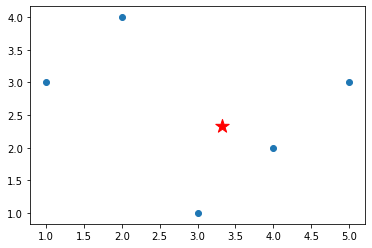

In [3]:
import matplotlib.pyplot as plt
plt.scatter(S[0,:], S[1,:])
plt.scatter(np.asscalar(v.value[0]), np.asscalar(v.value[1]), marker='*', c='r', s=200)
plt.show()

行列$A \in \mathbb{R}^{m \times n} \ (m>n)$とベクトル$\boldsymbol{b} \in \mathbb{R}^m$が与えてられているとき、**平方根LASSO**というデータ解析法では以下の最適化問題を解く。
$$
 \begin{equation*}
       \begin{aligned}
           & \text{Minimize}
               & \|A\boldsymbol{x}-\boldsymbol{b}\|_2+\gamma\|\boldsymbol{x}\|_1 \\
       \end{aligned}
   \end{equation*}
$$

ただし、$\gamma>0$は定数。この問題は次の2次錘計画問題に帰着できる。

$$
 \begin{equation*}
       \begin{aligned}
           & \text{Minimize}
               & z+\sum_{j=1}^{n}\gamma w_j \\
           & \text{subject to}
               & z &\ge \|A\boldsymbol{x}-\boldsymbol{b}\|_2 \\
               && w_j &\ge |x_j|, \ \ j=1,...n
       \end{aligned}
   \end{equation*}
$$

ただし、変数は$\boldsymbol{x} \in \mathbb{R}^n$および$z, w_1,...,w_n \in \mathbb{R}$

In [4]:
import cvxpy as cp
import numpy as np

In [5]:
m, n, g = 10, 5, 0.1
np.random.seed(1)
A, b = np.random.randn(m,n), 10 * np.random.randn(m)
x = cp.Variable(n)
z = cp.Variable()
w = cp.Variable(n)
obj  = cp.Minimize( z + (g * sum(w)) )
cons = [z >= cp.norm(A @ x - b),
        w >= cp.abs(x)]
P = cp.Problem(obj, cons)
P.solve(verbose=True)
print(x.value)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -5.204e-19  -9.535e-20  +4e+01  8e-01  3e-03  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +1.789e+01  +1.796e+01  +7e+00  6e-02  4e-04  2e-01  4e-01  0.8802  6e-02   2  2  2 |  0  0
 2  +1.973e+01  +1.973e+01  +5e-01  4e-03  3e-05  2e-02  3e-02  0.9261  6e-04   2  1  1 |  0  0
 3  +1.988e+01  +1.988e+01  +1e-02  1e-04  8e-07  6e-04  8e-04  0.9808  8e-03   2  1  1 |  0  0
 4  +1.988e+01  +1.988e+01  +1e-03  1e-05  8e-08  6e-05  7e-05  0.9056  4e-03   2  1  1 |  0  0
 5  +1.988e+01  +1.988e+01  +2e-04  2e-06  1e-08  1e-05  1e-05  0.9022  8e-02   2  1  1 |  0  0
 6  +1.988e+01  +1.988e+01  +6e-05  5e-07  4e-09  3e-06  3e-06  0.8130  1e-01   2  1  1 |  0  0
 7  +1.988e+01  +1.988e+01  +3e-06  3e-08  2e-10  2e-07  2e-07  0.9494  4e-04   1  1  1 |  0  0
 8  +1.988e+01  +1.988e+01  +2e-07  2e-09  2e-

より簡潔に以下のように記述することもできる。

In [6]:
m, n, g = 10, 5, 0.1
np.random.seed(1)
A, b = np.random.randn(m,n), 10 * np.random.randn(m)
x = cp.Variable(n)
obj  = cp.Minimize( cp.norm(A @ x - b) \
                    + (g * sum(cp.abs(x))) )
P = cp.Problem(obj)
P.solve(verbose=True)
print(x.value)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +2e+02  9e-01  6e-01  1e+00  4e+00    ---    ---    1  1  - |  -  - 
 1  +2.090e+01  +2.113e+01  +3e+01  8e-02  7e-02  4e-01  5e-01  0.9260  7e-02   2  2  2 |  0  0
 2  +2.066e+01  +2.079e+01  +4e+00  1e-02  2e-02  2e-01  8e-02  0.8627  2e-02   2  1  1 |  0  0
 3  +2.009e+01  +2.017e+01  +2e+00  7e-03  1e-02  1e-01  3e-02  0.6867  1e-01   1  1  1 |  0  0
 4  +1.991e+01  +1.992e+01  +2e-01  7e-04  1e-03  6e-03  4e-03  0.9271  4e-02   2  1  1 |  0  0
 5  +1.988e+01  +1.988e+01  +2e-02  5e-05  8e-05  2e-04  3e-04  0.9333  2e-02   2  1  1 |  0  0
 6  +1.988e+01  +1.988e+01  +5e-04  2e-06  3e-06  1e-05  1e-05  0.9771  1e-02   2  1  1 |  0  0
 7  +1.988e+01  +1.988e+01  +6e-05  2e-07  3e-07  2e-06  1e-06  0.8809  5e-03   2  1  1 |  0  0
 8  +1.988e+01  +1.988e+01  +1e-05  5e-08  7e-